In [ ]:
## Third part

In [60]:
class particle(object):
    g = 9.8
    dt = 0.5           # time step
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt
        
    def get_impact_v(self, g_variable):

        y = [self.y] # since we do not know the size of the arrays, we define first a python list
        v = [self.v] # the append method is more efficient for lists than arrays
        t = [0.]

        while self.y > 0.:
            fy = -self.mass*g / (1+(self.y/6.37e6)**2) if g_variable else -self.mass*g
            self.euler(fy, dt)
            y.append(self.y)
            v.append(self.v)
            t.append(t[-1]+dt)

        t_data = np.array(t) # we convert the list into a numpy array for plotting
        y_data = np.array(y)
        v_data = np.array(v)

        return t_data,y_data,v_data
    
    

impact velecity is -83.300000 m/s 



Text(0,0.5,'velocity(m/s)')

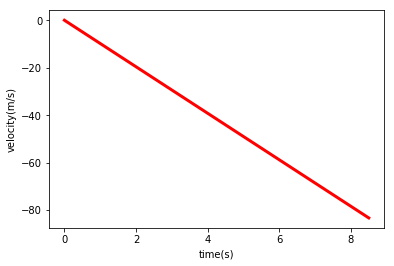

In [61]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

mass = 0.01        # mass of the particle
y0 = 300.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity

p = particle(mass, y0, v0)

#for i in range(0,t_data.size):
#    print i,t_data[i], y_data[i], v_data[i]

t_data,y_data,v_data = p.get_impact_v(g_variable=True)

print('impact velecity is %f m/s \n' % v_data[-1])
pyplot.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('velocity(m/s)')

In [62]:
## find out 1% difference y0
y0 = 500
v0 = 0
dv_perc = 0

while dv_perc < 0.01:
    y0 += 1
    p = particle(mass, y0, v0)
    _,_,v_data1 = p.get_impact_v(g_variable=True)
    p = particle(mass, y0, v0)
    _,_,v_data2 = p.get_impact_v(g_variable=False)
    dv_perc = abs(v_data2[-1]/v_data1[-1] - 1)

print('required height to make a 0.01 difference is %f m \n' % y0)


required height to make a 0.01 difference is 735.000000 m 



In [ ]:
## Last part, coming soon...